In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def slice_seconds(data, sample_rate, seconds=5, pad_seconds=0):
    # return 2d array of the original data
    n = len(data)
    k = sample_rate*seconds
    pad = sample_rate*pad_seconds
    indexes = np.array(
        [
            np.arange(i, i + k + pad)
            for i in range(0, n, k)
            if i + k + pad <= n
        ]
    )
    indexed = data[indexes]
    return list(zip((np.arange(len(indexed))+1)*5, indexed))

In [7]:
input_df = pd.read_csv("../data/input/train_soundscape_labels.csv")
cens_df = pd.read_pickle("../data/cens/train_soundscapes/data.pkl.gz")

In [8]:
cens_df["_snippet"] = cens_df[["name", "data", "sample_rate"]].apply(lambda x: slice_seconds(x.data, x.sample_rate), axis=1)
exploded = cens_df.explode("_snippet")
exploded["seconds"] = exploded["_snippet"].apply(lambda x: x[0])
exploded["snippet"] = exploded["_snippet"].apply(lambda x: x[1])
exploded["site"] = exploded.name.apply(lambda x: x.split("_")[1])
exploded["audio_id"] = exploded.name.apply(lambda x: x.split("_")[0]).astype(int)
tx_df = input_df.merge(exploded, on=["site", "audio_id", "seconds"])
tx_df["y"] = tx_df.birds.apply(lambda x: 0.0 if x == "nocall" else 1.0)
tx_df

,row_id,site,audio_id,seconds,birds,name,parent,data,sample_rate,cens,cens_sample_rate,path,_snippet,snippet,y
0,7019_COR_5,COR,7019,5,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(5, [-0.074927814, -0.070623636, -0.012813405,...","[-0.074927814, -0.070623636, -0.012813405, -0....",0.0
1,7019_COR_10,COR,7019,10,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(10, [0.012558174, -0.0062861964, -0.010699186...","[0.012558174, -0.0062861964, -0.0106991865, 0....",0.0
2,7019_COR_15,COR,7019,15,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(15, [0.0211886, 0.05153161, 0.0547787, 0.0683...","[0.0211886, 0.05153161, 0.0547787, 0.06838079,...",0.0
3,7019_COR_20,COR,7019,20,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(20, [-0.09674744, -0.12779698, -0.11827926, -...","[-0.09674744, -0.12779698, -0.11827926, -0.110...",0.0
4,7019_COR_25,COR,7019,25,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(25, [0.059325323, 0.049653903, 0.06464528, 0....","[0.059325323, 0.049653903, 0.06464528, 0.06322...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(580, [-0.03339911, -0.02001738, -0.017174277,...","[-0.03339911, -0.02001738, -0.017174277, -0.01...",0.0
2396,54955_SSW_585,SSW,54955,585,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(585, [0.1398685, 0.14535491, 0.14392486, 0.14...","[0.1398685, 0.14535491, 0.14392486, 0.14465475...",1.0
2397,54955_SSW_590,SSW,54955,590,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(590, [-0.008788381, -0.017808164, -0.02109720...","[-0.008788381, -0.017808164, -0.021097202, -0....",1.0
2398,54955_SSW_595,SSW,54955,595,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(595, [0.056973755, 0.033190306, 0.017808143, ...","[0.056973755, 0.033190306, 0.017808143, 0.0071...",0.0


In [5]:
import IPython.display as ipd

for row in tx_df.sample(5).itertuples():
    print(row.birds)
    ipd.display(ipd.Audio(row.snippet, rate=row.sample_rate))

nocall


nocall


nocall


bkcchi reevir1


nocall


In [266]:
def mixup(df, alpha=0.4):
    shuf = df.sample(frac=1).reset_index(drop=True)
    x1 = np.stack(df.snippet.values)
    x2 = np.stack(shuf.snippet.values)
    y1 = df.y.values
    y2 = shuf.y.values
    a = np.random.beta(alpha, alpha, (x1.shape[0], 1))
    return (
        a*x1+(1-a)*x2,
        (a.T*y1+(1-a.T)*y2).reshape(-1)
    )

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.stack(tx_df.snippet.values)
y = tx_df.y.values
X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
X_train.shape, y_train.shape

((9000, 110250), (9000,))

(array([374.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

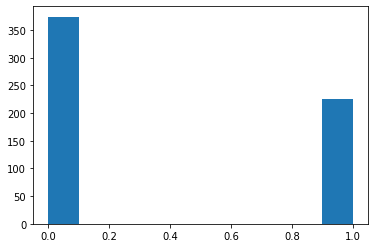

In [77]:
plt.hist(y_test)

TODO

Use simple CNN architecture

* cens 2 w/ smoothing
* cens 2 w/o smoothing
* cens 10 w/ smoothing
* cnes 10 w/0 smoothing
* cens 2 @ 36 bins (best of smoothing/no smoothing)
* mels (n_fft = sr // 10, hop_length = sr // 1e4), power to db

In [95]:
import librosa
from birdclef.utils import cens_per_sec
from multiprocessing import Pool
from tqdm.auto import tqdm
from functools import partial

In [96]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=41
)
n = X.shape[0]
with Pool(8) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))

  0%|          | 0/2400 [00:00<?, ?it/s]

(2400, 12, 51)

In [99]:
Xc = np.array(conv).reshape(n, -1)
Xc.shape

(2400, 612)

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(Xc, y)
clf = SVC().fit(X_train, y_train)
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
df = pd.DataFrame(scores)
ipd.display(df)
df.describe()

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.560099,0.366004,0.666667,0.277108,0.718733
1,0.509011,0.378463,0.652778,0.384236,0.674907
2,0.486465,0.402693,0.641667,0.302703,0.633666
3,0.651552,0.399761,0.677778,0.355556,0.705078
4,0.733281,0.540414,0.683333,0.359551,0.683151


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.588082,0.417467,0.664444,0.335831,0.683107
std,0.103044,0.070387,0.017280,0.044274,0.032648
min,0.486465,0.366004,0.641667,0.277108,0.633666
25%,0.509011,0.378463,0.652778,0.302703,0.674907
50%,0.560099,0.399761,0.666667,0.355556,0.683151
75%,0.651552,0.402693,0.677778,0.359551,0.705078
max,0.733281,0.540414,0.683333,0.384236,0.718733


In [131]:
params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 5, 10]})

In [132]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.523970,0.086035,0.204443,0.028540,1,{'C': 1},0.666667,0.652778,0.641667,0.677778,0.683333,0.664444,0.015456,3
1,0.600674,0.050942,0.189568,0.005278,5,{'C': 5},0.680556,0.655556,0.627778,0.688889,0.702778,0.671111,0.026562,1
2,0.608671,0.048735,0.188641,0.014920,10,{'C': 10},0.675000,0.644444,0.644444,0.691667,0.672222,0.665556,0.018476,2


## pipelined

In [27]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
y = tx_df.y.values
y_pred = np.random.randint(2, size=y.shape[0])
(
    accuracy_score(y_pred, y),
    f1_score(y_pred, y),
    roc_auc_score(y_pred, y)
)

(0.5133333333333333, 0.429130009775171, 0.5104819800260529)

In [240]:
import librosa
import librosa.display
from birdclef.utils import cens_per_sec
from multiprocessing import Pool
from tqdm.auto import tqdm
from functools import partial
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


In [265]:
def _mixup(x_in, y_in, alpha=0.4):
    n = x_in.shape[0]
    # draw from uniform instead of beta(alpha, alpha, BATCH_SIZE)
    w = np.random.beta(alpha, alpha, size=n)
    x_weight = w.reshape(-1, 1)
    index = np.random.permutation(n)

    x = x_in * x_weight + x_in[index] * (1-x_weight)
    y = y_in * w + y_in[index] * (1-w)
    
    return x, y

@tf.function(input_signature=[
    tf.TensorSpec(None, tf.float64), 
    tf.TensorSpec(None, tf.float64), 
])
def tf_mixup(x_in, y_in):
    x, y = tf.numpy_function(_mixup, [x_in, y_in], [tf.float64, tf.float64])
    return tf.data.Dataset.from_tensor_slices((x, y))

def add_mixup(dataset, batch_size=32):
    return (
        dataset
        .shuffle(batch_size)
        .window(batch_size)
        .flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(batch_size), y.batch(batch_size))))
        .map(tf_mixup, num_parallel_calls=tf.data.AUTOTUNE)
        .flat_map(lambda x: x)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )

def plot_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['auc'], label='train')
    plt.plot(history.history['val_auc'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

In [239]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values
sample_rate=22050

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=41
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params, scoring="roc_auc")
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.513254,0.025424,0.192386,0.015762,1,{'C': 1},0.647069,0.650861,0.655995,0.619410,0.688173,0.652302,0.021962,1
1,0.506863,0.025551,0.182635,0.006211,5,{'C': 5},0.619987,0.646398,0.648948,0.629647,0.680159,0.645028,0.020567,2
2,0.523007,0.029735,0.179273,0.007119,10,{'C': 10},0.601799,0.633142,0.629350,0.632408,0.666487,0.632637,0.020533,3


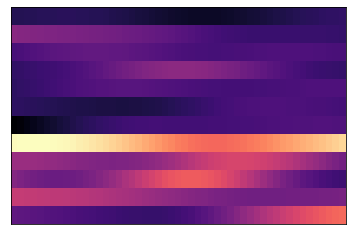

In [33]:
i = np.where(y==1)[0][0]
librosa.display.specshow(conv[i])
plt.show()
ipd.Audio(X[i], rate=sample_rate)

In [241]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D, Reshape, InputLayer
from tensorflow.keras.metrics import BinaryAccuracy, AUC

def get_compiled_model(input_shape=612, output_shape=1):
    n = input_shape
    k = int(np.ceil(np.sqrt(n)))
    rpad = k**2 - n
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Reshape((1, n, 1)))
    model.add(ZeroPadding2D(((0, 0), (0, rpad))))
    model.add(Reshape((k, k, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_shape, activation='sigmoid'))
    
    model.compile(optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy', AUC(name="auc")])
    return model

In [242]:
model = get_compiled_model(X_train.shape[1])
model.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_93 (Reshape)         (None, 1, 612, 1)         0         
_________________________________________________________________
zero_padding2d_47 (ZeroPaddi (None, 1, 625, 1)         0         
_________________________________________________________________
reshape_94 (Reshape)         (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 23, 23, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 3872)            

Epoch 1/20
57/57 [==============================] - 2s 18ms/step - loss: 0.6713 - accuracy: 0.6157 - auc: 0.4861 - val_loss: 0.6589 - val_accuracy: 0.6200 - val_auc: 0.5722
Epoch 2/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6529 - accuracy: 0.6333 - auc: 0.5616 - val_loss: 0.6546 - val_accuracy: 0.6200 - val_auc: 0.6020
Epoch 3/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6467 - accuracy: 0.6333 - auc: 0.6158 - val_loss: 0.6504 - val_accuracy: 0.6200 - val_auc: 0.6200
Epoch 4/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6406 - accuracy: 0.6374 - auc: 0.6333 - val_loss: 0.6448 - val_accuracy: 0.6283 - val_auc: 0.6404
Epoch 5/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6321 - accuracy: 0.6389 - auc: 0.6551 - val_loss: 0.6384 - val_accuracy: 0.6333 - val_auc: 0.6538
Epoch 6/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6216 - accuracy: 0.6470 - auc: 0.6737 - val_loss: 0.6323 - v

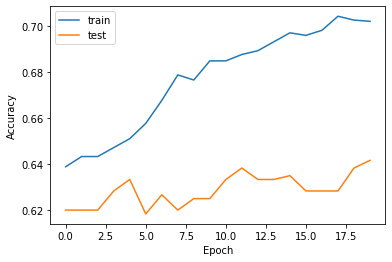

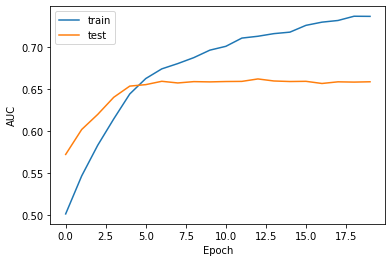

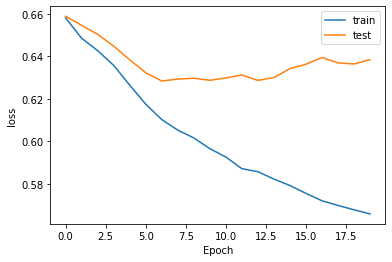

In [243]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
history = model.fit(
    train_dataset.batch(32),
    epochs=20, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

Epoch 1/20
57/57 [==============================] - 1s 17ms/step - loss: 0.5118 - accuracy: 0.4583 - auc: 0.7238 - val_loss: 0.7292 - val_accuracy: 0.6250 - val_auc: 0.6140
Epoch 2/20
57/57 [==============================] - 1s 16ms/step - loss: 0.5053 - accuracy: 0.4622 - auc: 0.7297 - val_loss: 0.7142 - val_accuracy: 0.6333 - val_auc: 0.6257
Epoch 3/20
57/57 [==============================] - 1s 16ms/step - loss: 0.5052 - accuracy: 0.4671 - auc: 0.7292 - val_loss: 0.7210 - val_accuracy: 0.6350 - val_auc: 0.6292
Epoch 4/20
57/57 [==============================] - 1s 16ms/step - loss: 0.5037 - accuracy: 0.4715 - auc: 0.7254 - val_loss: 0.7184 - val_accuracy: 0.6517 - val_auc: 0.6256
Epoch 5/20
57/57 [==============================] - 1s 16ms/step - loss: 0.5071 - accuracy: 0.4682 - auc: 0.7147 - val_loss: 0.7190 - val_accuracy: 0.6400 - val_auc: 0.6287
Epoch 6/20
57/57 [==============================] - 1s 16ms/step - loss: 0.5011 - accuracy: 0.4704 - auc: 0.7387 - val_loss: 0.7361 - v

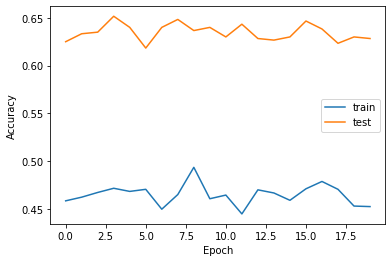

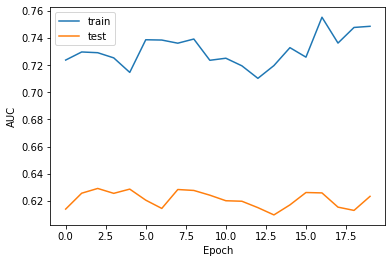

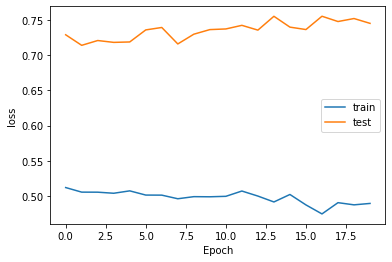

In [264]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
history = model.fit(
    add_mixup(train_dataset),
    epochs=20, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

In [276]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
    
convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
)

n = X_train.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_train), total=n))
X_train = np.array(conv).reshape(n, -1)

n = X_test.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_test), total=n))
X_test = np.array(conv).reshape(n, -1)

  0%|          | 0/9000 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/50
282/282 [==============================] - 4s 11ms/step - loss: 0.6661 - accuracy: 0.5281 - auc: 0.4857 - val_loss: 0.6610 - val_accuracy: 0.6267 - val_auc: 0.5156
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6547 - accuracy: 0.5316 - auc: 0.4486 - val_loss: 0.6611 - val_accuracy: 0.6267 - val_auc: 0.5394
Epoch 3/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6519 - accuracy: 0.5316 - auc: 0.4613 - val_loss: 0.6555 - val_accuracy: 0.6267 - val_auc: 0.5595
Epoch 4/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6485 - accuracy: 0.5316 - auc: 0.4870 - val_loss: 0.6521 - val_accuracy: 0.6267 - val_auc: 0.5770
Epoch 5/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6453 - accuracy: 0.5316 - auc: 0.5106 - val_loss: 0.6499 - val_accuracy: 0.6267 - val_auc: 0.5841
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6425 - accuracy: 0.5316 - auc: 0.5316 - val_loss: 0.6

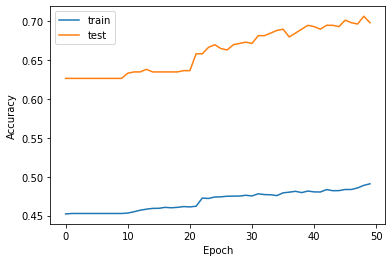

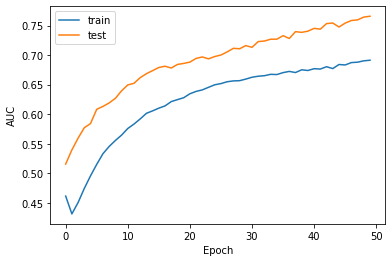

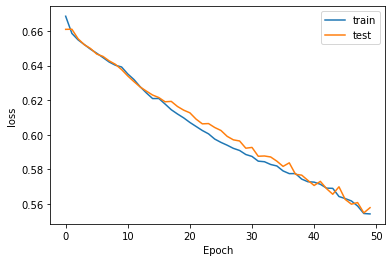

In [277]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    train_dataset.batch(32),
    epochs=50, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

In [281]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
    
convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12,
    win_len_smooth=None
)

n = X_train.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_train), total=n))
X_train = np.array(conv).reshape(n, -1)

n = X_test.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_test), total=n))
X_test = np.array(conv).reshape(n, -1)

  0%|          | 0/9000 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/50
282/282 [==============================] - 4s 11ms/step - loss: 0.6705 - accuracy: 0.5136 - auc: 0.4652 - val_loss: 0.6483 - val_accuracy: 0.6417 - val_auc: 0.6976
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6536 - accuracy: 0.5268 - auc: 0.5165 - val_loss: 0.6341 - val_accuracy: 0.6417 - val_auc: 0.7113
Epoch 3/50
282/282 [==============================] - 3s 11ms/step - loss: 0.6412 - accuracy: 0.5268 - auc: 0.5720 - val_loss: 0.6234 - val_accuracy: 0.6417 - val_auc: 0.7130
Epoch 4/50
282/282 [==============================] - 3s 10ms/step - loss: 0.6319 - accuracy: 0.5268 - auc: 0.5954 - val_loss: 0.6185 - val_accuracy: 0.6417 - val_auc: 0.7245
Epoch 5/50
282/282 [==============================] - 3s 10ms/step - loss: 0.6222 - accuracy: 0.5268 - auc: 0.6153 - val_loss: 0.6165 - val_accuracy: 0.6417 - val_auc: 0.7175
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6157 - accuracy: 0.5268 - auc: 0.6325 - val_loss: 

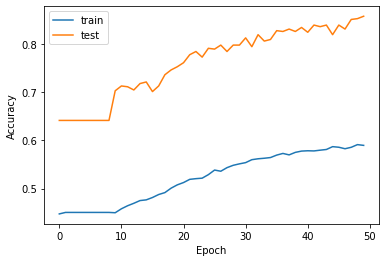

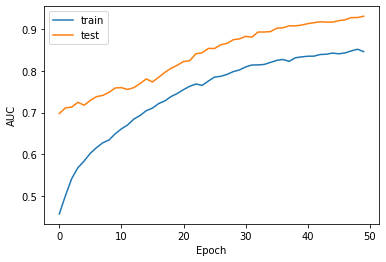

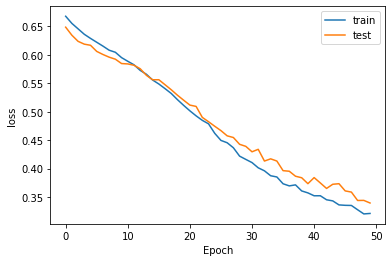

In [282]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    train_dataset.batch(32),
    epochs=50, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

In [283]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
    
convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=36,
    win_len_smooth=4
)

n = X_train.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_train), total=n))
X_train = np.array(conv).reshape(n, -1)

n = X_test.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_test), total=n))
X_test = np.array(conv).reshape(n, -1)

  0%|          | 0/9000 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/50
282/282 [==============================] - 4s 12ms/step - loss: 0.6643 - accuracy: 0.5206 - auc: 0.4934 - val_loss: 0.6340 - val_accuracy: 0.6350 - val_auc: 0.6796
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6202 - accuracy: 0.5370 - auc: 0.6285 - val_loss: 0.6128 - val_accuracy: 0.6417 - val_auc: 0.7127
Epoch 3/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5977 - accuracy: 0.5529 - auc: 0.6680 - val_loss: 0.5966 - val_accuracy: 0.6733 - val_auc: 0.7342
Epoch 4/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5793 - accuracy: 0.5680 - auc: 0.6944 - val_loss: 0.5797 - val_accuracy: 0.6883 - val_auc: 0.7508
Epoch 5/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5563 - accuracy: 0.5866 - auc: 0.7214 - val_loss: 0.5676 - val_accuracy: 0.7033 - val_auc: 0.7639
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5317 - accuracy: 0.6061 - auc: 0.7470 - val_loss: 0.5

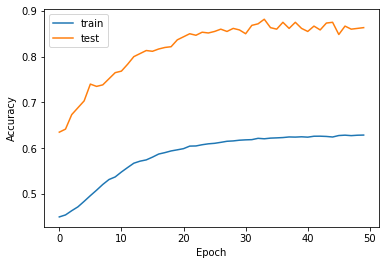

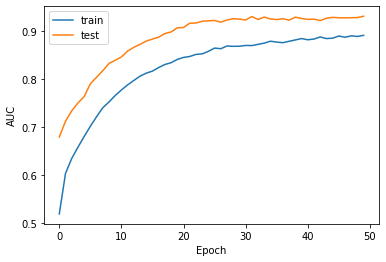

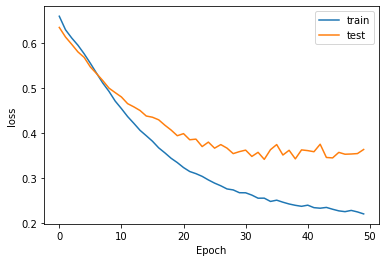

In [284]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    train_dataset.batch(32),
    epochs=50, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

In [285]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
    
convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=36,
    win_len_smooth=None
)

n = X_train.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_train), total=n))
X_train = np.array(conv).reshape(n, -1)

n = X_test.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_test), total=n))
X_test = np.array(conv).reshape(n, -1)

  0%|          | 0/9000 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/50
282/282 [==============================] - 4s 10ms/step - loss: 0.6632 - accuracy: 0.4977 - auc: 0.4980 - val_loss: 0.6144 - val_accuracy: 0.6533 - val_auc: 0.7106
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6147 - accuracy: 0.5303 - auc: 0.6376 - val_loss: 0.5908 - val_accuracy: 0.6833 - val_auc: 0.7462
Epoch 3/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5932 - accuracy: 0.5498 - auc: 0.6711 - val_loss: 0.5743 - val_accuracy: 0.6883 - val_auc: 0.7678
Epoch 4/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5715 - accuracy: 0.5755 - auc: 0.6999 - val_loss: 0.5544 - val_accuracy: 0.7200 - val_auc: 0.7920
Epoch 5/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5484 - accuracy: 0.5864 - auc: 0.7255 - val_loss: 0.5369 - val_accuracy: 0.7500 - val_auc: 0.8143
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5198 - accuracy: 0.6091 - auc: 0.7533 - val_loss: 0.5

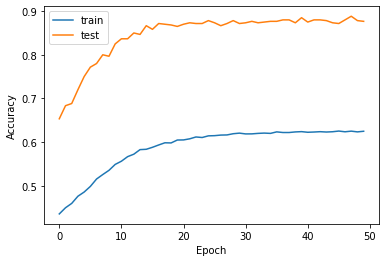

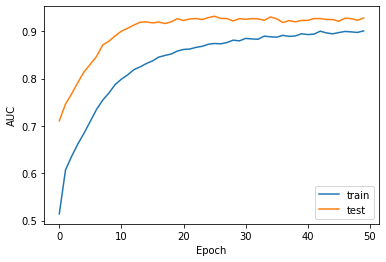

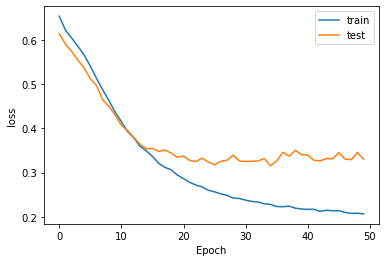

In [286]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    train_dataset.batch(32),
    epochs=50, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

In [287]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
    
convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 4), 
    n_chroma=36,
    win_len_smooth=None
)

n = X_train.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_train), total=n))
X_train = np.array(conv).reshape(n, -1)

n = X_test.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X_test), total=n))
X_test = np.array(conv).reshape(n, -1)

  0%|          | 0/9000 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/50
282/282 [==============================] - 5s 11ms/step - loss: 0.6730 - accuracy: 0.5269 - auc: 0.5045 - val_loss: 0.6401 - val_accuracy: 0.6433 - val_auc: 0.6690
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.6234 - accuracy: 0.5343 - auc: 0.6298 - val_loss: 0.6094 - val_accuracy: 0.6583 - val_auc: 0.7082
Epoch 3/50
282/282 [==============================] - 3s 10ms/step - loss: 0.5906 - accuracy: 0.5485 - auc: 0.6778 - val_loss: 0.5853 - val_accuracy: 0.6900 - val_auc: 0.7479
Epoch 4/50
282/282 [==============================] - 3s 10ms/step - loss: 0.5574 - accuracy: 0.5767 - auc: 0.7221 - val_loss: 0.5636 - val_accuracy: 0.7233 - val_auc: 0.7743
Epoch 5/50
282/282 [==============================] - 3s 10ms/step - loss: 0.5168 - accuracy: 0.6158 - auc: 0.7629 - val_loss: 0.5316 - val_accuracy: 0.7383 - val_auc: 0.8092
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.4745 - accuracy: 0.6447 - auc: 0.7969 - val_loss: 

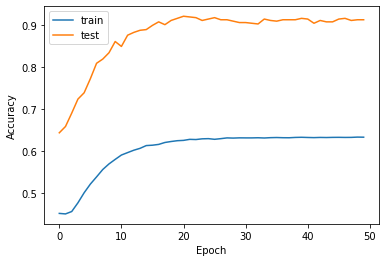

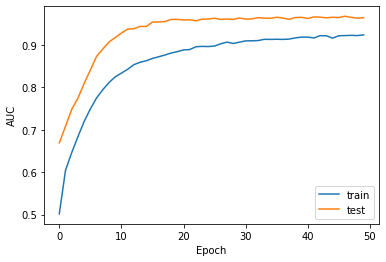

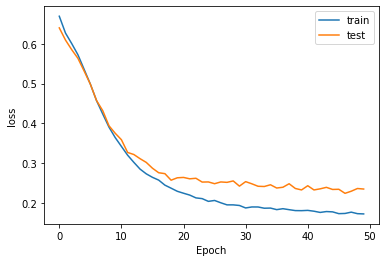

In [288]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    train_dataset.batch(32),
    epochs=50, 
    validation_data=test_dataset.batch(32)
)
plot_history(history)

## older, non-mixup

In [278]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
ipd.display(pd.DataFrame(clf.cv_results_))
clf.score(X_test, y_test)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.610864,0.057158,0.235959,0.002426,1,{'C': 1},0.644444,0.636111,0.644444,0.650000,0.650000,0.645000,0.005092,1
1,0.638396,0.023935,0.256295,0.003534,5,{'C': 5},0.655556,0.630556,0.652778,0.644444,0.622222,0.641111,0.012838,2
2,0.631567,0.010699,0.264621,0.004837,10,{'C': 10},0.647222,0.630556,0.647222,0.644444,0.622222,0.638333,0.010153,3


0.6533333333333333

In [279]:
clf.score(X_test, y_test)

0.6533333333333333

Epoch 1/20
57/57 [==============================] - 2s 19ms/step - loss: 0.6715 - accuracy: 0.6249 - auc: 0.4985 - val_loss: 0.6518 - val_accuracy: 0.6433 - val_auc: 0.5832
Epoch 2/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6531 - accuracy: 0.6264 - auc: 0.6137 - val_loss: 0.6446 - val_accuracy: 0.6317 - val_auc: 0.6250
Epoch 3/20
57/57 [==============================] - 1s 12ms/step - loss: 0.6382 - accuracy: 0.6359 - auc: 0.6228 - val_loss: 0.6436 - val_accuracy: 0.6350 - val_auc: 0.6245
Epoch 4/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6405 - accuracy: 0.6480 - auc: 0.6320 - val_loss: 0.6381 - val_accuracy: 0.6383 - val_auc: 0.6180
Epoch 5/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6236 - accuracy: 0.6456 - auc: 0.6849 - val_loss: 0.6418 - val_accuracy: 0.6350 - val_auc: 0.6194
Epoch 6/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6056 - accuracy: 0.6598 - auc: 0.7074 - val_loss: 0.6420 - v

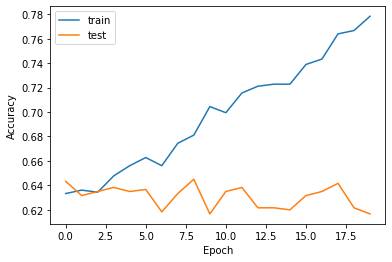

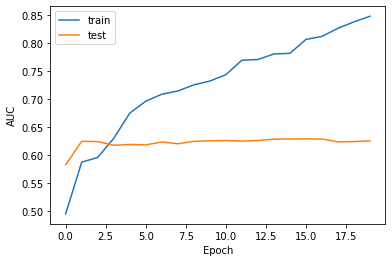

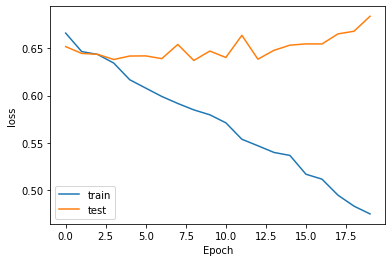

In [280]:
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    epochs=20, 
    validation_data=(X_test, y_test)
)
plot_history(history)

In [218]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=36, 
    win_len_smooth=4
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
ipd.display(pd.DataFrame(clf.cv_results_))
clf.score(X_test, y_test)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277835,0.012566,0.135748,0.003197,1,{'C': 1},0.652778,0.661111,0.641667,0.661111,0.650000,0.653333,0.007328,1
1,0.331732,0.003397,0.140614,0.002252,5,{'C': 5},0.597222,0.633333,0.630556,0.616667,0.652778,0.626111,0.018476,2
2,0.330330,0.005854,0.138711,0.002887,10,{'C': 10},0.608333,0.608333,0.633333,0.613889,0.655556,0.623889,0.018308,3


0.6516666666666666

Epoch 1/20
57/57 [==============================] - 2s 18ms/step - loss: 0.6627 - accuracy: 0.6393 - auc: 0.4531 - val_loss: 0.6593 - val_accuracy: 0.6117 - val_auc: 0.5788
Epoch 2/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6424 - accuracy: 0.6270 - auc: 0.6161 - val_loss: 0.6376 - val_accuracy: 0.6233 - val_auc: 0.6576
Epoch 3/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6089 - accuracy: 0.6508 - auc: 0.6780 - val_loss: 0.6242 - val_accuracy: 0.6233 - val_auc: 0.6966
Epoch 4/20
57/57 [==============================] - 1s 11ms/step - loss: 0.5920 - accuracy: 0.6700 - auc: 0.7060 - val_loss: 0.6209 - val_accuracy: 0.6267 - val_auc: 0.7017
Epoch 5/20
57/57 [==============================] - 1s 11ms/step - loss: 0.5864 - accuracy: 0.6845 - auc: 0.7229 - val_loss: 0.6068 - val_accuracy: 0.6467 - val_auc: 0.7120
Epoch 6/20
57/57 [==============================] - 1s 11ms/step - loss: 0.5519 - accuracy: 0.7104 - auc: 0.7634 - val_loss: 0.6134 - v

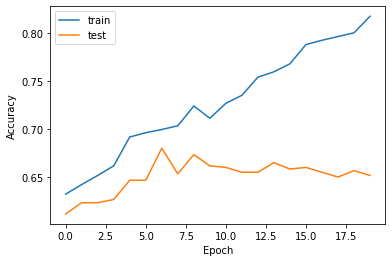

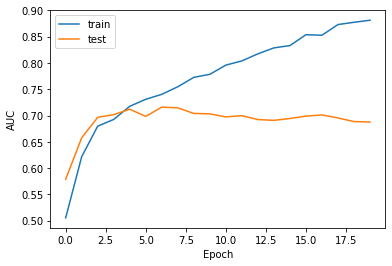

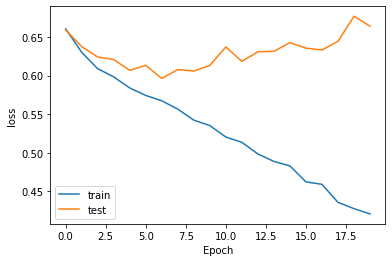

In [219]:
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    epochs=20, 
    validation_data=(X_test, y_test)
)
plot_history(history)

In [220]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 5), 
    n_chroma=36, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
ipd.display(pd.DataFrame(clf.cv_results_))
clf.score(X_test, y_test)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.159576,0.105271,0.401383,0.016070,1,{'C': 1},0.688889,0.666667,0.625000,0.650000,0.669444,0.660000,0.021416,1
1,1.223635,0.025341,0.402669,0.004630,5,{'C': 5},0.705556,0.675000,0.619444,0.644444,0.633333,0.655556,0.030982,3
2,1.242777,0.023425,0.402032,0.005809,10,{'C': 10},0.708333,0.672222,0.622222,0.647222,0.636111,0.657222,0.030358,2


0.6566666666666666

Epoch 1/20
57/57 [==============================] - 2s 18ms/step - loss: 0.6768 - accuracy: 0.6007 - auc: 0.5069 - val_loss: 0.6474 - val_accuracy: 0.6450 - val_auc: 0.5463
Epoch 2/20
57/57 [==============================] - 1s 11ms/step - loss: 0.6156 - accuracy: 0.6606 - auc: 0.6722 - val_loss: 0.6106 - val_accuracy: 0.6650 - val_auc: 0.6715
Epoch 3/20
57/57 [==============================] - 1s 11ms/step - loss: 0.5859 - accuracy: 0.6943 - auc: 0.7382 - val_loss: 0.6069 - val_accuracy: 0.6317 - val_auc: 0.6885
Epoch 4/20
57/57 [==============================] - 1s 11ms/step - loss: 0.5316 - accuracy: 0.7308 - auc: 0.8038 - val_loss: 0.6250 - val_accuracy: 0.6283 - val_auc: 0.6762
Epoch 5/20
57/57 [==============================] - 1s 11ms/step - loss: 0.4834 - accuracy: 0.7684 - auc: 0.8417 - val_loss: 0.6446 - val_accuracy: 0.6283 - val_auc: 0.6555
Epoch 6/20
57/57 [==============================] - 1s 12ms/step - loss: 0.4263 - accuracy: 0.8216 - auc: 0.8869 - val_loss: 0.6619 - v

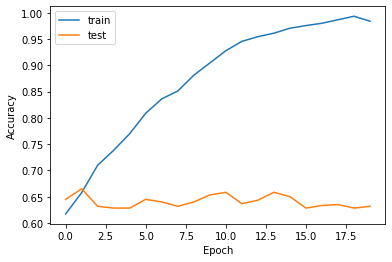

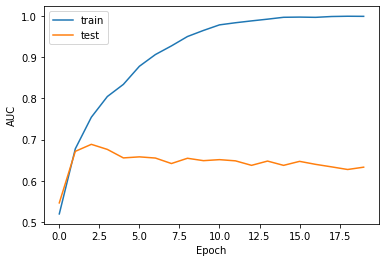

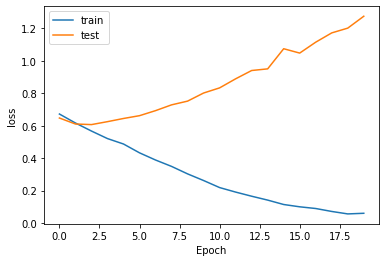

In [221]:
model = get_compiled_model(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    epochs=20, 
    validation_data=(X_test, y_test)
)
plot_history(history)

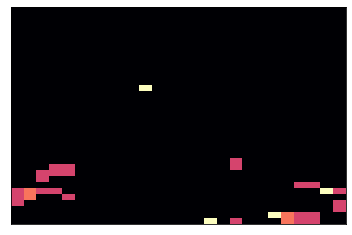

In [224]:
import librosa.display
i = np.where(y==1)[0][8]
librosa.display.specshow(conv[i])
plt.show()
ipd.Audio(X[i], rate=sample_rate)